**<h1 style="text-align: center;">Image Classification  Project</h1>**

Questions that I have
1. Shall I delete the images that are having the error sRGB first and then scale or visa versa
2. How to tune the machine learning model.

## 👋🏼 **Introduction**

<p style="text-align: justify;">I am a data scientist for a company called Secure Cams. And it is building an application in which if you take pictures of gym equipments, it should be able to detect which equipment it is. The problem that currently the company is facing it there are many equipemnts in the gym which people have paid subscription for but they are not using it because they do not know what the equipment is and they do not know how ot use it. So, with this project the aim of my company is to build a deep leaning pipeline and implement this in their gym application. So that an user can take a picture of an equipment and will be able to find out what the equipment is and how to use it.</p>

## 🧿 **Objective**
 <p style="text-align: justify;">The objective of this project is that I will have to build a module which will try to classify the category of gym equipment. For this my company has given me a dataset which has images of many equipments which are divided into diffrent folders. So I will be using these images in the folders and building an accurate Deep Learning Model using Convolutional Neural Network. Firstly I will be going through the full image dataset and trying to remove the unwanted images with unsupported extensions. And then using these images I will be building a model. I will also be doing several experiments in order to improve the performance of the model. I will be including these test results in the I will check if our dataset is balanced and if there is a requirement to increase the dataset so that our model can learn better from the data. Then I will choose the best-performing model to build my final model with the best-suited parameters.
 </p>

**About the data**  
This dataset contains 12 columns. This data set is from Kaggle. You can [**click here**](https://www.kaggle.com/datasets/starsiwach/4-gym-equipment-types-classification-dataset) to view the dataset on kaggle.

## **Table of Content**

##### ⬇ [**Importing Libraries**](#library)
##### 📊 [**Importing Dataset**](#dataset)
##### 🗺️ [**Exploring the dataset**](#exploration)
##### 💭 [**My taughts on the dataset**](#thoughts)
##### ⚙️ [**Pre-processing the data**](#processing)
##### 🔧 [**Feature Engineering**](#feature)
##### 🗂️ [**Selecting the best model for our dataset**](#selection)
##### ✅ [**Assessing which gives us the best results**](#assess)
##### 🎛️ [**Hyper-Parameter Tuning**](#tuning)
##### 🏁 [**Final Model**](#Final)
##### 💡 [**Conclusion**](#conclusion)


## ***Let's begin....***

<a id='library'></a>
## ⬇ <span style="color: #20479b; font-weight: bold;">Importing Libraries</span>

I start by importing the necessary libraries for my Exploratory Data Analysis tasks in Python.

In [3]:
import  pandas as  pd
import os
import warnings
import    numpy as  np
import cv2
import sklearn.model_selection
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import tensorflow as tf
import imghdr
warnings.filterwarnings("ignore", category=UserWarning, module="cv2")
import plotly.express as px
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv2D

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

<a id='dataset'></a>  

## 📊 <span style="color: #20479b; font-weight: bold;">Importing Dataset</span>

In [5]:
dtst_dir = '/Users/jasonjoelpinto/Documents/GitHub/python-datascience-projects/014. image_classification_project/dataset/Gym Data'
extensions = ['png','jpeg','jpg']

Here I have specified the data directory where I have saved my images in my local computer.
I have also created a list of extensions which I will be taking into consideration in this pipeline. I will be deleting everything else.
Let's check how many folders/categories are there in my directory.

In [6]:
os.listdir(dtst_dir)

['.DS_Store',
 'Recumbent Bike',
 'Home Machine',
 'Dumbells',
 'Elliptical Machine']

If we ignore the DS store which is the defaut masos folder. We can see that there are 4 folders. Which means that we have four types of equiments which we need to build a machine learning model from.

In [7]:
os.listdir(os.path.join(dtst_dir,'Recumbent Bike'))[:10]

['th11.jpg',
 'OIP.C2ZbX9ZGlRuIjUbe8fMJewHaHf.jpg',
 'OIP.KzuhaoewQnswx2XCpnYd1QHaHa.jpg',
 '_exercise_bike_nordictrack_commercial_vr21_recumbent_exercise_bike_2000x2000.jpg',
 'OIP.2GjM5otBzxkNdtm7iEmVrwHaGq2.jpg',
 'OIP.1Uim6l2OHqK8y5m0h5jubAHaHa.jpg',
 'OIP.Lv7SbVfUI5J5c2X1YgcN7wHaHa.jpg',
 'Recumbent-Bike-Marcy-NS-40502R-2__09389.1501001516.jpg',
 'OIP.dOGuZHUSrFeuZF28cuZ95gHaHa.jpg',
 'f4f2572d-3c0c-4079-820f-154935f3d66c_1.bfefaacbac800cfae8b76c2fd132d239.jpeg']

Here I am selecting first 10 image names in the recumbent Bike folder.

I have built the below code so that it can run though all the images and remove the images which do not support the extensions list that we have.

In [8]:
print(extensions)
from PIL import Image
for folder in os.listdir(dtst_dir):
    if folder == '.DS_Store':
        continue
    folder_dir = os.path.join(dtst_dir, folder)
    for file in  os.listdir(folder_dir):
        file_dir = os.path.join(folder_dir, file) 
        try:
            extension = imghdr.what(file_dir)
            # print(extension)
            # print(file_dir)
            # if extension == 'png':
            #     with Image.open(file_path) as img:
            #         img.save(file_path)
                    
            image = cv2.imread(file_dir)
            
            if extension not in extensions:
                print(f'Extension {extension} not supported, hence will be deleted >> {file_dir}')
                os.remove(file_dir)
        except Exception as exp:
            print(f'Extension error for {extension} >> {file_dir}')

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning, module='cv2')

['png', 'jpeg', 'jpg']


In [9]:
image

array([[[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]]

As you can see there an image is saved in array. It will be in a matrix format. Let's check the shape of image and see.

In [10]:
image.shape

(156, 156, 3)

As you can see here it has three values. the first 156 represents the height of the image. Second number represents the width of the image. And the third one is the color. Since we have a colored images it will be stored in 3 channels that is red green blue.

We can also check the type of the datatype for the variable image.

In [11]:
type(image)

numpy.ndarray

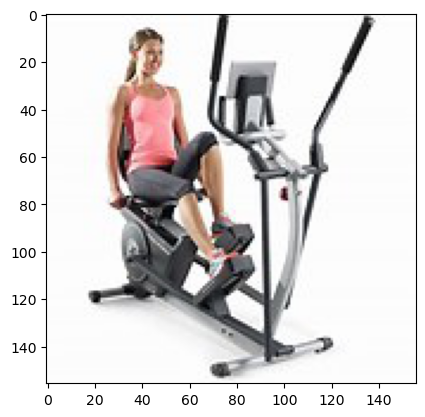

In [12]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
dt = tf.keras.utils.image_dataset_from_directory(dtst_dir)

Found 792 files belonging to 4 classes.


2024-06-23 16:58:35.621109: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-06-23 16:58:35.621257: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-06-23 16:58:35.621276: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-06-23 16:58:35.621821: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-23 16:58:35.622100: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<a id='exploration'></a>
## 🗺️ <span style="color: #20479b; font-weight: bold;">Exploring the dataset</span>

**Note:**
For EDA I will be using the main data. Once data is normalized, I will be splitting it into `train` and `test` split.
1. Screening the images in the pipeline one by one takes a lot of time. Hence we will be looking at only few of the images and making sure that it correctly maintained.
2. I will be splitting the data after normalization because otherwise, the three datasets won't be even. 

Here one disadvantage that I saw is that we cannot view the image randomly. We need a iterator with loads the data in batches and then we can load the data. Let's view some of the images.

In [14]:
dt_itr = dt.as_numpy_iterator()
dt_itr

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x30d22f810>)

In [15]:
btc_load = dt_itr.next()
len(btc_load)

2

Here if you see the length of the batch is 2. That is because it will contain images and the label of the image seperately. Hence 2. 
Now let us check the shape of 0th position of the batch.

In [16]:
btc_load[0].shape

(32, 256, 256, 3)

Here is you see there are 4 values. In this 32 stands for the batch size, 256 is the width of the images, another 256 stands for the height of the image and 3 means color value. In this case since the pictures are colored it is 3 (rgb).

In [17]:
btc_load[1]

array([1, 1, 0, 2, 3, 1, 3, 3, 0, 3, 0, 2, 3, 2, 0, 1, 3, 1, 3, 1, 1, 0,
       1, 3, 2, 0, 0, 1, 1, 0, 1, 1], dtype=int32)

These are the labels with numbers indicating different classes.

In [18]:
eq_class = dt.class_names
eq_class

['Dumbells', 'Elliptical Machine', 'Home Machine', 'Recumbent Bike']

Now as per the class order,
1 = Dumbells
2 = Elliptical Machine
3 = Home Machine
4 = Recumbent Bike

Let's check if it is in order before we proceed. To check this I will plot 4 images and check

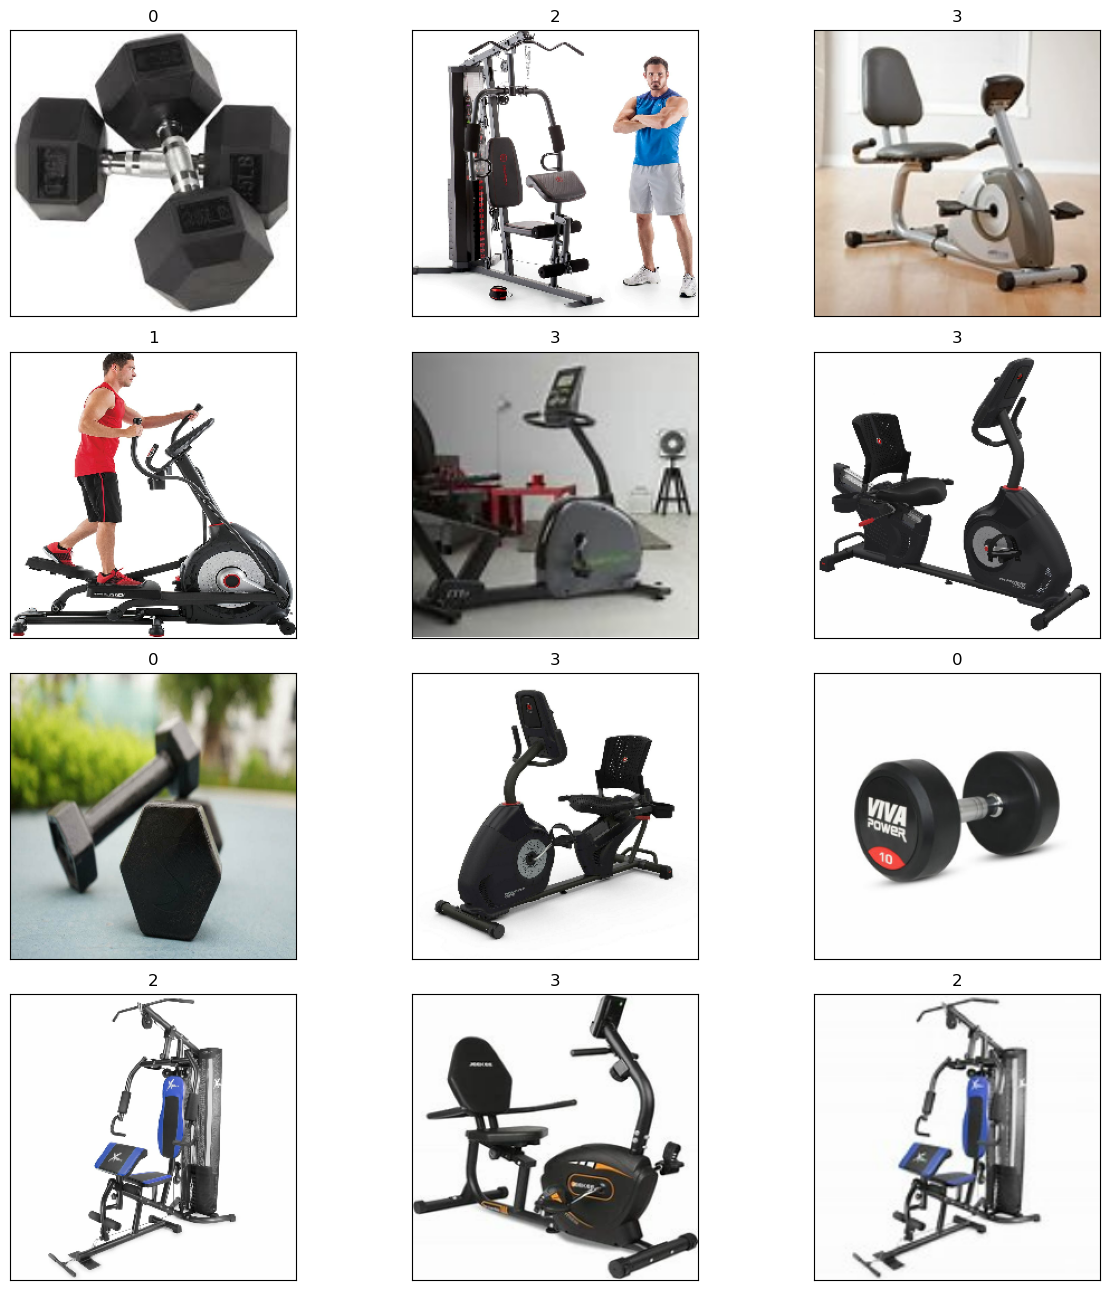

In [19]:
fig, impt = plt.subplots(nrows=4, ncols=3, figsize= (13,13))

impt = impt.flatten()

for i, img in enumerate(btc_load[0][2:14]):
    impt[i].imshow(img.astype(int))
    impt[i].title.set_text(btc_load[1][2:14][i])
    impt[i].set_xticks([])
    impt[i].set_yticks([])    

plt.tight_layout()
plt.show()

As you can see in these above pictures the images are correctly catergorized.

<a id='thoughts'></a>
## 💭 <span style="color: #20479b; font-weight: bold;">My thoughts on the dataset</span>

As per my initial Data Exploration,
- I can see that the dataset big enough to build a ML model.
- This dataset consited of unnessary files which wouldn't be supported, hence I have removed it.
- There is one particular file which is giving me the error of incorrect srgb profile maintainance. I will be trying to find which file is it and deleting that file.
- We have loaded the data using keras image from directory function. This has made it very easy.
- The data in maintained in two indexes. Index 0 containes the image itself and index 1 contains the labels for the corresponding image.
- the sRGB error that we are getting can be ignored but having said that it can have a impact on the model as well hence I will be trying to remove it.
- It is difficult to check the image data here in the pipeline, hence I have validated the data in my file explorer as well.
- As I will have to train the model and then later test it, I will be splitting our dataset into two parts. Training, Validation and Testing split.


Evaluation Metrics:
For this dataset I will be using, Accuracy, precision, F1 are the evaluation metrics.



Considering all these above points, I will be following the below steps to 

**⚙️ pre-process**
1. 🔍 Find the images which are giving you issues.
2. 🗑️ Delete all the images that have issues with the sRGB profile.
<!-- 4. ➗ Spliting our main datset into two parts, one part for training and another for testing dataframe
    - Doing it before testing or 
    - to avoid data Scalling and oversampling. -->

**🔧 feature Engineer**
1. ⚖️ Scalling the numerical and categorical labels

<!-- 2. 📈 Oversampling the data for stroke = 1, Because of two main reasons.
    - Our focus is on stroke detection and data for people who have stroke is very less.
    - We do not have to worry about data size as well here, since it's not very huge. -->

<a id='processing' ></a>
## ⚙️ <span style="color: #20479b; font-weight: bold;">Pre-processing the data</span>


**1. ❎ Scaling the data**

since the data is not loaded at once, and it get loaded which processing we cannot scale the whole dataset at once. Hence I will be creating a lamda function to scale the lamda function on load and then we will check if it's working as expected..

In [20]:
scld_dt = dt.map(lambda pictures, label: (pictures/255, label))

Now, next when I call function to load a batch it should automatically scale the dataset and load it for us. And to verify it we will be checking the max and min value of the loaded dataset.

In [21]:
scld_btc = scld_dt.as_numpy_iterator().next()

In [22]:
print(f'Min Values :{scld_btc[0].min()}')
print(f'Max Values :{scld_btc[0].max ()}')

Min Values :0.0
Max Values :1.0


Hence we can confirm that our data is been successfully scaled.

Now just to check that our image data is preserved even when we scaled the data let's load the pictures again and check if any image data is lost.

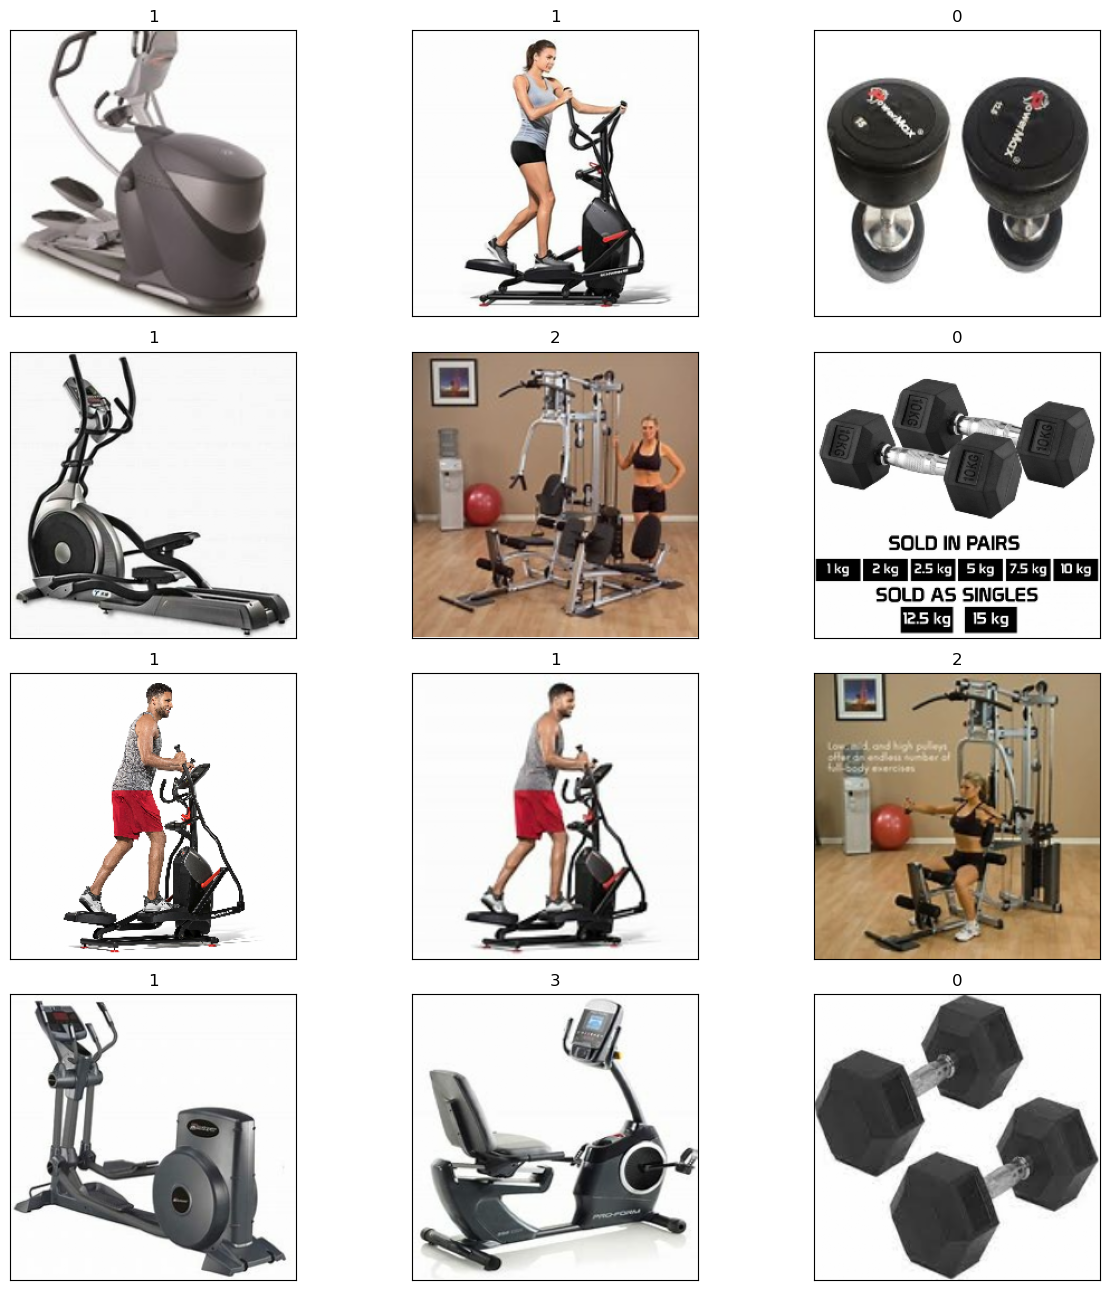

In [23]:
fig, impt = plt.subplots(nrows=4, ncols=3, figsize= (13,13))

impt = impt.flatten()

for i, img in enumerate(scld_btc[0][2:14]):
    impt[i].imshow(img)
    impt[i].title.set_text(scld_btc[1][2:14][i])
    impt[i].set_xticks([])
    impt[i].set_yticks([])    

plt.tight_layout()
plt.show()

**2. ❎ Splitting the data**

Now that we have scaled the data, we can split the dataset.

In [24]:
len(dt)

25

So, in total there are 25 batches. We can deviled them 7:2:1 ratio.

In [25]:
train_btc_size = 17
validation_btc_size = 5
test_btc_size= 3

In [26]:
train_btc_dt = scld_dt.take(train_btc_size)
validation_btc_dt = scld_dt.skip(train_btc_size).take(validation_btc_size)
test_btc_dt = scld_dt.skip(train_btc_size+validation_btc_size).take(test_btc_size)

In [27]:
print(f'Total batches in Train      :{len(train_btc_dt)}')
print(f'Total batches in Validation :{len(validation_btc_dt)}')
print(f'Total batches in Test       :{len(test_btc_dt)}')

Total batches in Train      :17
Total batches in Validation :5
Total batches in Test       :3


<a id='feature' ></a>
## 🔧 <span style="color: #20479b; font-weight: bold;">Feature Engineering</span>


<a id='feature' ></a>
## 🔧 <span style="color: #20479b; font-weight: bold;">Deep Leaning Model</span>

#### **1. ❎ Building a model**

In [28]:
mdl = Sequential([
     tf.keras.layers.Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))
    ,tf.keras.layers.MaxPooling2D()
    ,tf.keras.layers.Conv2D(32, (3,3), 1, activation='relu')
    ,tf.keras.layers.MaxPooling2D()
    # ,tf.keras.layers.Conv2D(16, (3,3), 1, activation='relu')
    # ,tf.keras.layers.MaxPooling2D()
    ,tf.keras.layers.Flatten()
    ,tf.keras.layers.Dense(256, activation='relu')
    ,tf.keras.layers.Dense(4, activation='softmax')
])

mdl.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [33]:
mdl.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    31,490,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,489,262 (360.45 MB)

 Trainable params: 31,496,420 (120.15 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,992,842 (240.30 MB)

1jkrjelj


### Model Summary

**Model: "sequential"**

| Layer (type)                   | Output Shape           | Param #       |
|--------------------------------|------------------------|---------------|
| conv2d (Conv2D)                | (None, 254, 254, 16)   | 448           |
| max_pooling2d (MaxPooling2D)   | (None, 127, 127, 16)   | 0             |
| conv2d_1 (Conv2D)              | (None, 125, 125, 32)   | 4,640         |
| max_pooling2d_1 (MaxPooling2D) | (None, 62, 62, 32)     | 0             |
| flatten (Flatten)              | (None, 123008)         | 0             |
| dense (Dense)                  | (None, 256)            | 31,490,304    |
| dense_1 (Dense)                | (None, 4)              | 1,028         |

**Total params:** 31,496,420 (120.15 MB)  
**Trainable params:** 31,496,420 (120.15 MB)  
**Non-trainable params:** 0 (0.00 B)


In [30]:
logdir='logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
hist = mdl.fit(train_btc_dt, epochs=15, validation_data=validation_btc_dt, callbacks=[tensorboard_callback])

Epoch 1/15


2024-06-23 16:58:56.669469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 472ms/step - accuracy: 0.2772 - loss: 18.4402 - val_accuracy: 0.3625 - val_loss: 1.3481
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 515ms/step - accuracy: 0.5864 - loss: 1.1669 - val_accuracy: 0.7437 - val_loss: 0.7088
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 441ms/step - accuracy: 0.8444 - loss: 0.4920 - val_accuracy: 0.9250 - val_loss: 0.3255
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 579ms/step - accuracy: 0.9690 - loss: 0.1599 - val_accuracy: 0.9875 - val_loss: 0.1542
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 711ms/step - accuracy: 0.9808 - loss: 0.0887 - val_accuracy: 0.9375 - val_loss: 0.2022
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 725ms/step - accuracy: 0.9950 - loss: 0.0343 - val_accuracy: 0.9625 - val_loss: 0.1002
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 532ms/step - accuracy: 0.9985 - loss: 0.0255 - val_accuracy: 0.9812 - val_loss: 0.0672
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 576ms/step - accuracy: 0.9936 - loss: 0.0483 - val_accuracy: 0.9812

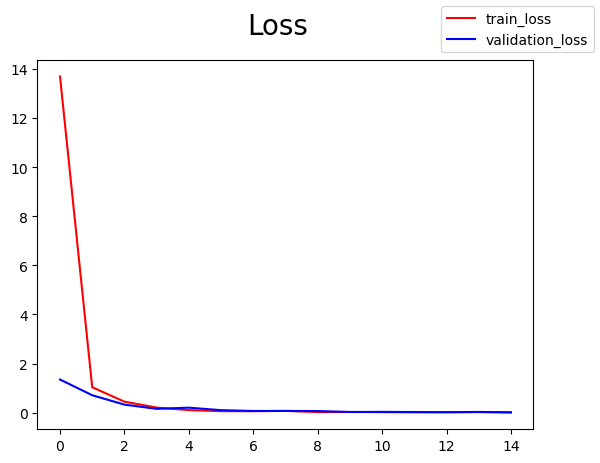

In [36]:
loss_plot = plt.figure()
plt.plot(hist.history['loss'], color='red', label='train_loss')
plt.plot(hist.history['val_loss'], color='blue', label='validation_loss')
loss_plot.suptitle('Loss', fontsize=20)
loss_plot.legend(loc="upper right")
loss_plot.show()

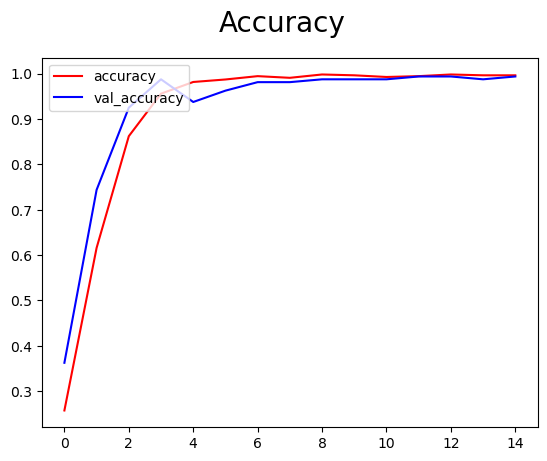

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

<a id='selection'></a>
## 🗂️ <span style="color: #20479b; font-weight: bold;">Experimental Section</span>

So I have 10 different configurations and choose the best out of these

#### **1. Config 1**

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 241ms/step - accuracy: 0.2463 - loss: 84.2803 - val_accuracy: 0.1625 - val_loss: 46.8580
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 286ms/step - accuracy: 0.3949 - loss: 42.8499 - val_accuracy: 0.5938 - val_loss: 12.5540
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 269ms/step - accuracy: 0.5693 - loss: 10.0307 - val_accuracy: 0.5500 - val_loss: 18.4090
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 246ms/step - accuracy: 0.6256 - loss: 10.4484 - val_accuracy: 0.7812 - val_loss: 9.7750
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 286ms/step - accuracy: 0.6397 - loss: 8.9204 - val_accuracy: 0.6687 - val_loss: 6.5082
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 232ms/step - accuracy: 0.7315 - loss: 4.2164 - val_accuracy: 0.7500 - val_loss: 4.3492
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 360ms/step - accuracy: 0.7554 - loss: 4.0902 - val_accuracy: 0.7937 - val_loss: 3.0384
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 304ms/step - accuracy: 0.8083 - loss: 2.4032 - val_accur

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)            │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │       786,436 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,359,310 (9.00 MB)

 Trainable params: 786,436 (3.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,572,874 (6.00 MB)

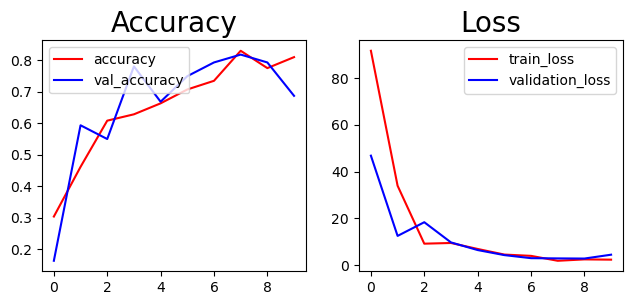

,Train Loss,Validation Loss,Accuracy,Validation Accuracy
0,91.697990,46.857994,0.303309,0.16250
1,34.007496,12.554028,0.461397,0.59375
2,9.236757,18.408966,0.608456,0.55000
3,9.528324,9.775041,0.628676,0.78125
4,6.977334,6.508187,0.663603,0.66875
5,4.579749,4.349174,0.707721,0.75000
6,4.021281,3.038355,0.735294,0.79375
7,1.923284,2.939413,0.830882,0.81875
8,2.515109,2.875427,0.775735,0.79375
9,2.402283,4.521346,0.810662,0.68750


In [58]:
mdl_config1 = Sequential([

    tf.keras.layers.Flatten(input_shape=(256,256,3))
    ,tf.keras.layers.Dense(4, activation='softmax')
])

mdl_config1.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = mdl_config1.fit(train_btc_dt, epochs=10, validation_data=validation_btc_dt, callbacks=[tensorboard_callback])
print('')
print('=====================================================================================================')
print('')

mdl_config1.summary()

fig, (acc, lss) = plt.subplots(1, 2, figsize=(7.5, 3))

acc.plot(hist.history['accuracy'], color='red', label='accuracy')
acc.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy')
acc.set_title('Accuracy', fontsize=20)
acc.legend(loc="upper left")

lss.plot(hist.history['loss'], color='red', label='train_loss')
lss.plot(hist.history['val_loss'], color='blue', label='validation_loss')
lss.set_title('Loss', fontsize=20)
lss.legend(loc="upper right")

plt.show()




loss_df = pd.DataFrame({
    'Train Loss': hist.history['loss'],
    'Validation Loss': hist.history['val_loss'],
    'Accuracy': hist.history['accuracy'],
    'Validation Accuracy': hist.history['val_accuracy'],   
})
loss_df

In [ ]:
mdl_config1 = Sequential([
     tf.keras.layers.Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))
    ,tf.keras.layers.MaxPooling2D()
    ,tf.keras.layers.Conv2D(32, (3,3), 1, activation='relu')
    # ,tf.keras.layers.MaxPooling2D()
    ,tf.keras.layers.Flatten()
    # ,tf.keras.layers.Dense(256, activation='relu')
    ,tf.keras.layers.Dense(4, activation='softmax')
])

mdl_config1.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = mdl_config1.fit(train_btc_dt, epochs=3, validation_data=validation_btc_dt, callbacks=[tensorboard_callback])
print('')
print('=====================================================================================================')
print('')

mdl_config1.summary()

fig, (acc, lss) = plt.subplots(1, 2, figsize=(7.5, 3))

acc.plot(hist.history['accuracy'], color='red', label='accuracy')
acc.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy')
acc.set_title('Accuracy', fontsize=20)
acc.legend(loc="upper left")

lss.plot(hist.history['loss'], color='red', label='train_loss')
lss.plot(hist.history['val_loss'], color='blue', label='validation_loss')
lss.set_title('Loss', fontsize=20)
lss.legend(loc="upper right")

plt.show()




loss_df = pd.DataFrame({
    'Train Loss': hist.history['loss'],
    'Validation Loss': hist.history['val_loss'],
    'Accuracy': hist.history['accuracy'],
    'Validation Accuracy': hist.history['val_accuracy'],   
})
loss_df

<a id='assess'></a>
## ✅ <span style="color: #20479b; font-weight: bold;">Assessing which gives us the best results</span>

I want to choose the best-performing model. And the margin can be very very small hence I will create a list. And then I will keep appending the value metric list. I will loop through all the models that I have and then I will print the results according to the valuation metrics.

In [117]:
type(fet_test_df)

pandas.core.frame.DataFrame

In [140]:
val_met_list = []


mdl_list = [log_reg,svc,ran_for_cls,xg_bst,k_n_n]

for i, mdl in enumerate(mdl_list):

    if mdl==k_n_n:
        fet_train_smot_val = fet_train_smot.values
        tar_train_smot_val = tar_train_smot.values
        fet_test_df_val    = fet_test_df.values
    else:
        fet_train_smot_val = fet_train_smot
        tar_train_smot_val = tar_train_smot
        fet_test_df_val    = fet_test_df

    tar_pred_df = pd.Series(mdl.predict(
                                fet_test_df_val
                                ))


    val_met_list.append([ 
                        mdl.__class__.__name__,
                        cross_val_score(estimator=mdl, X=fet_train_smot_val, y=tar_train_smot_val, cv=15).mean(), 
                        accuracy_score(tar_test_df, tar_pred_df),
                        roc_auc_score(tar_test_df, tar_pred_df),
                        precision_score(tar_test_df, tar_pred_df),
                        f1_score(tar_test_df, tar_pred_df)
                        ])


val_met_df = pd.DataFrame(val_met_list
                        ,columns=['Model Name','Avg ACC','ACC','AUC','PRE','F1']
                        )
val_met_df = val_met_df.sort_values(
                                    ascending=False, by=['Avg ACC','ACC','AUC']
                                    )
val_met_df

,Model Name,Avg ACC,ACC,AUC,PRE,F1
2,RandomForestClassifier,0.972179,0.928717,0.508307,0.055556,0.054054
3,XGBClassifier,0.960737,0.925662,0.519347,0.073171,0.075949
1,SVC,0.931449,0.916497,0.501951,0.041667,0.046512
4,KNeighborsClassifier,0.929712,0.874745,0.568633,0.087379,0.127660
0,LogisticRegression,0.905089,0.921589,0.580369,0.145455,0.172043


Here we can see that Ran forest performed the best will the avegare acccuracy of 97.21, and AUC of 0.50.
Xgboost is the second best will the avegare acccuracy of 96.07, and AUC of 0.51.


As per our valuation metrics the best model out of them are
1. Random Forest
2. Xgboost

Let us try to tune these two models and try to find we can get the model to perform even better score.

<a id='tuning'></a>
## 🎛️ <span style="color: #20479b; font-weight: bold;">Hyper-Parameter Tuning</span>

I will using gridsearchcv and passing it multiple values so that it can choose a best value for us.

####  <span style=" font-weight: bold;">Random Forest Classifier</span>

In [139]:
params = {'criterion':['gini', 'log_loss'],'n_estimators':[60,80,100,120,140],  'random_state' : [1200,None]}
param_result_list = []
grid_ser_cv = GridSearchCV(ran_for_cls,params,cv=5)
grid_ser_cv.fit(fet_train_smot,tar_train_smot)
df_results = pd.DataFrame(grid_ser_cv.cv_results_)
param_result_list.append([grid_ser_cv.best_score_,grid_ser_cv.best_params_])

param_result_df = pd.DataFrame(param_result_list, columns=['best_score_','best_params_',])
param_result_df

,best_score_,best_params_
0,0.970583,"{'criterion': 'gini', 'n_estimators': 80, 'ran..."


####  <span style=" font-weight: bold;">Support Vector Classifier</span>

In [141]:
params = {'eta':[0.1,0.4,0.2,0.3],'booster':['dart','gblinear', 'gbtree']}
param_result_list = []
grid_ser_cv = GridSearchCV(xg_bst,params,cv=5)
grid_ser_cv.fit(x_train_smot,y_train_smot)
df_results = pd.DataFrame(grid_ser_cv.cv_results_)
param_result_list.append([grid_ser_cv.best_score_,grid_ser_cv.best_params_])

param_result_df = pd.DataFrame(param_result_list, columns=['best_score_','best_params_',])
param_result_df

,best_score_,best_params_
0,0.961667,"{'booster': 'gbtree', 'eta': 0.3}"


When we look at the scores of `random_forect_classifier` and `svm` model, we can come to a conclusion that both are a great model for this dataset.  
Having said that `random_forect_classifier` model perfomed sligtly better. Hence I willl choose that as my final model with `{'criterion': 'gini', 'n_estimators': 80, 'random_state': None}` as the hyperparameters.

<a id='Final'></a>
## 🏁 <span style="color: #20479b; font-weight: bold;">Final Model</span>

In [143]:
final_ran_for_cls =  sklearn.ensemble.RandomForestClassifier(criterion= 'log_loss', n_estimators= 60,  random_state = None)
final_ran_for_cls.fit(fet_train_smot,
            tar_train_smot
            )
y_pred_ran_for_cls = final_ran_for_cls.predict(
                                         fet_test_df
                                         )
print('Random Forest')
print('='*53)
print('AVG ACC }',cross_val_score(estimator=log_reg, X=fet_train_smot, y=tar_train_smot, cv=5).mean())
print('PRE     }',precision_score(tar_test_df, y_pred_ran_for_cls))
print('ACC     }',accuracy_score(tar_test_df, y_pred_ran_for_cls))
print('F1S     }',f1_score(tar_test_df, y_pred_ran_for_cls))
print('AUS     }',roc_auc_score(tar_test_df, y_pred_ran_for_cls))


Random Forest
AVG ACC } 0.9044252374080068
PRE     } 0.05405405405405406
ACC     } 0.9276985743380856
F1S     } 0.05333333333333334
AUS     } 0.5077776538804638


<a id='conclusion'></a>
## 💡 <span style="color: #20479b; font-weight: bold;">Conclusion</span>

To summarize everythin we did
- we started with loading the dataset
- In our eda we noticed that
    - identity column was unnessary.
    - body_mass_index column had null values.
    - dataset was pretty imbalanced.
- cleaned the data, by deleting null rows, dropping identity column, and split the data to avoid data leakage.
- And then we scaled the numerical and categorical values.
- oversampled the data using smote.

I tried 5 different model. Out of which `random forest classifier` and `xgboost` model performed the best.  
I tuned tuned the hyper parameters using `gridsearchCV` and found that amond both the models, `random forest classifier` outperformed `xgboost` slightly.

As per the valuation metrics I  found `random forest classifier` with `{'C': 1.4, 'degree': 4, 'kernel': 'poly'}` parameters provided the best with pretty good acccuracy of 93%.

With this model in place, now my company can use this model to take inputs from the users and prompt them if there are chances of getting a stroke for them. This solves the problem that we stated before. This will significantly help the users in reducing the rist of strokes, and notify them to get medical help as soon as possible.

I felt that if the data has more parametrics we could have improved more. Also `body_mass_index` of a person does impact on the chances of getting an stroke, but in this dataset it did not show the signs of it. Hence it will be better if data collection is done even more accurately to improve the accuracy of the model.

